## Slice grappa 
###### Author: Zimu Huo
###### Date: 05.2022

Slice grappa is used only for sms as the in plane acceleration factor is always 1. Hence, the output dimension should 
be the same as the input dimension. Kernel is trained for each slice and is able to project the sms data to each individual slice. 
Similarly, the slice grappa kernel is obtained in a least square fit. 


-------------------------------------------------------------------------
References

    [1] 
    Author:  Setsompop K et al. 
    Title: Blipped-controlled aliasing in parallel imaging for simultaneous multislice echo planar imaging with reduced g-factor penalty
    Link: https://onlinelibrary.wiley.com/doi/10.1002/mrm.23097

In [2]:
import sys
sys.path.insert(1, '../')
sys.path.insert(1, '../../')
import matplotlib.pyplot as plt
import numpy as np
from scipy import io
import util.simulator as simulate
from util.coil import *
from util.fft import *
import util.mask as undersample
from util.sg import *

In [4]:
numSlice =4
R = 4
from util.twix import *
file_sms = "../../meas_MID00134_FID55501_catesain_4slices.dat"
file = readtwix(file_sms)
data = file[0]['readouts'][...,:numSlice]
rawImage = ifft2c(data)
fovHeight, fovWidth, numCoil, _ = rawImage.shape
fovHeight, fovWidth, numCoil, _ = rawImage.shape

Software version: VD/VE (!?)

Scan  0
100 % parsed in 0 s. Estimated 0 s remaining.
Scan  1
100 % parsed in 2 s. Estimated 0 s remaining.
----------------------------------------------------------------------------------------------------
reading raw data, calculating trajectories and sampling raster 


  0%|          | 0/1063 [00:00<?, ?it/s]

----------------------------------------------------------------------------------------------------
file parsed
----------------------------------------------------------------------------------------------------
loading and preprocessing the data..
----------------------------------------------------------------------------------------------------
dynamically combining data according to dtype, sli, par, rep..


  0%|          | 0/4 [00:00<?, ?it/s]

----------------------------------------------------------------------------------------------------
finished, the output is stored in a list format and each element of the list is a dictionary.
To access the data, use file[idx]["readout"] or file[idx]["flags"]
                                                                                                    
idx  file type
0   DATA


In [5]:
rawData = np.zeros(rawImage.shape, dtype = complex)
for sli in range (numSlice):
        rawData[:,:,:,sli] = fft2c(rawImage[:,:,:,sli])

In [6]:
cycle = np.arange(0,1,1/numSlice) * 2* np.pi
numAccq = int(numSlice*fovHeight/R)

In [7]:
print(cycle)

[0.         1.57079633 3.14159265 4.71238898]


In [7]:
shift = cycle*numAccq/(2*np.pi)
dataR = fft2c(simulate.multiSliceCAIPI(rawImage, cycle, R))

In [8]:
acsshift = cycle*int(numSlice* 32/R)/(2*np.pi)
acsK = simulate.acs(rawData, (32, 32))
acsIm = ifft2c(acsK)
calib = fft2c(simulate.singleSliceFov(acsIm,acsshift))

patch taken from 112 : 144 in y
patch taken from 112 : 144 in x


In [10]:
recon = sg(dataR, calib)

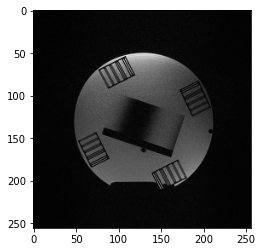

In [11]:
show(rsos(ifft2c(recon[:,:,:,0])))